<a href="https://colab.research.google.com/github/HammadN98/Curso_Estatistica/blob/main/S9Exercicios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

 Carregue a base de dados das casas (house-prices.csv) e gere as correlações entre todos os atributos. Quais atributos estão mais relacionados com o preço das casas?

In [2]:
casas = pd.read_csv("https://raw.githubusercontent.com/HammadN98/Curso_Estatistica/main/dados/house_prices.csv")
casas.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [3]:
casas.drop(labels= ['id', 'date', 'sqft_living', 'sqft_lot'], axis=1, inplace=True)
casas.head(5)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
casas.corr()

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.525138,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.515884,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525138,0.515884,1.000000,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
floors,0.256794,0.175429,0.500653,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006582,0.063744,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.187737,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.124982,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.664983,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.605567,0.477600,0.685342,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050
sqft_basement,0.323816,0.303093,0.283770,-0.245705,0.080588,0.276947,0.174105,0.168392,-0.051943,1.000000,-0.133124,0.071323,0.074845,0.110538,-0.144765,0.200355,0.017276


"sqft_living" possui a maior correlacao com o algo "price" e pode ser considerada a unica correlacao forte entre os dados X price. Ja que eh a unica que obteve + de 0.7(porem a variavel foi descartada ja que a variavel "sqft_living15" eh uma versao atualizada dela, e possui apenas uma correlacao moderada de 0.58
"long" possui a menor correlacao com o alvo "price" com um valor de 0.021, considerada uma correlacao muito fraca

<Axes: xlabel='sqft_living15', ylabel='price'>

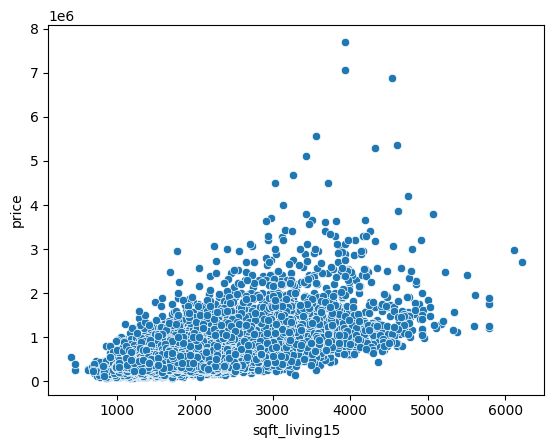

In [6]:
#Visualizando a correlacao de "sqft_living" X "price"
sns.scatterplot(x = casas['sqft_living15'], y =  casas['price'])

<Axes: xlabel='grade', ylabel='price'>

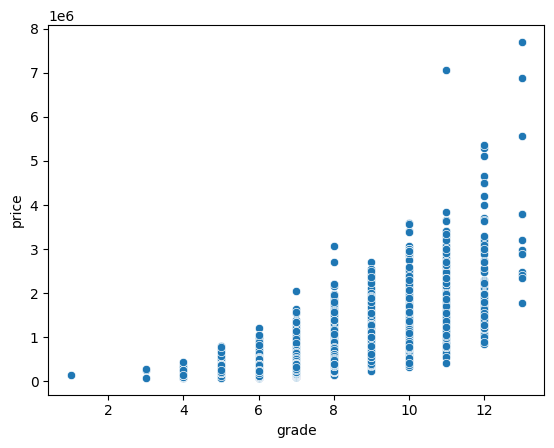

In [12]:
#Visualizando a correlacao de "grade"" X "price"
sns.scatterplot(x = casas['grade'], y =  casas['price'])

<Axes: xlabel='long', ylabel='price'>

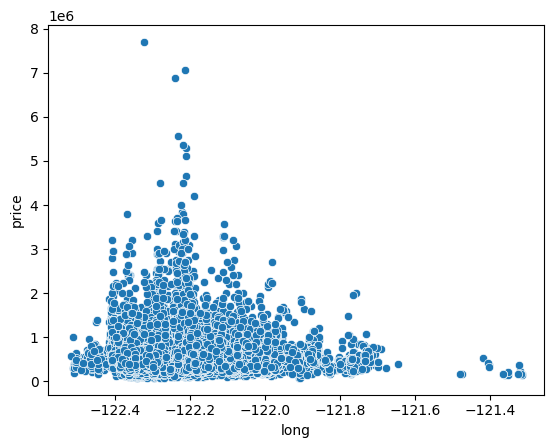

In [8]:
|#Visualizando a correlacao de "long" X "price"
sns.scatterplot(x = casas['long'], y =  casas['price'])


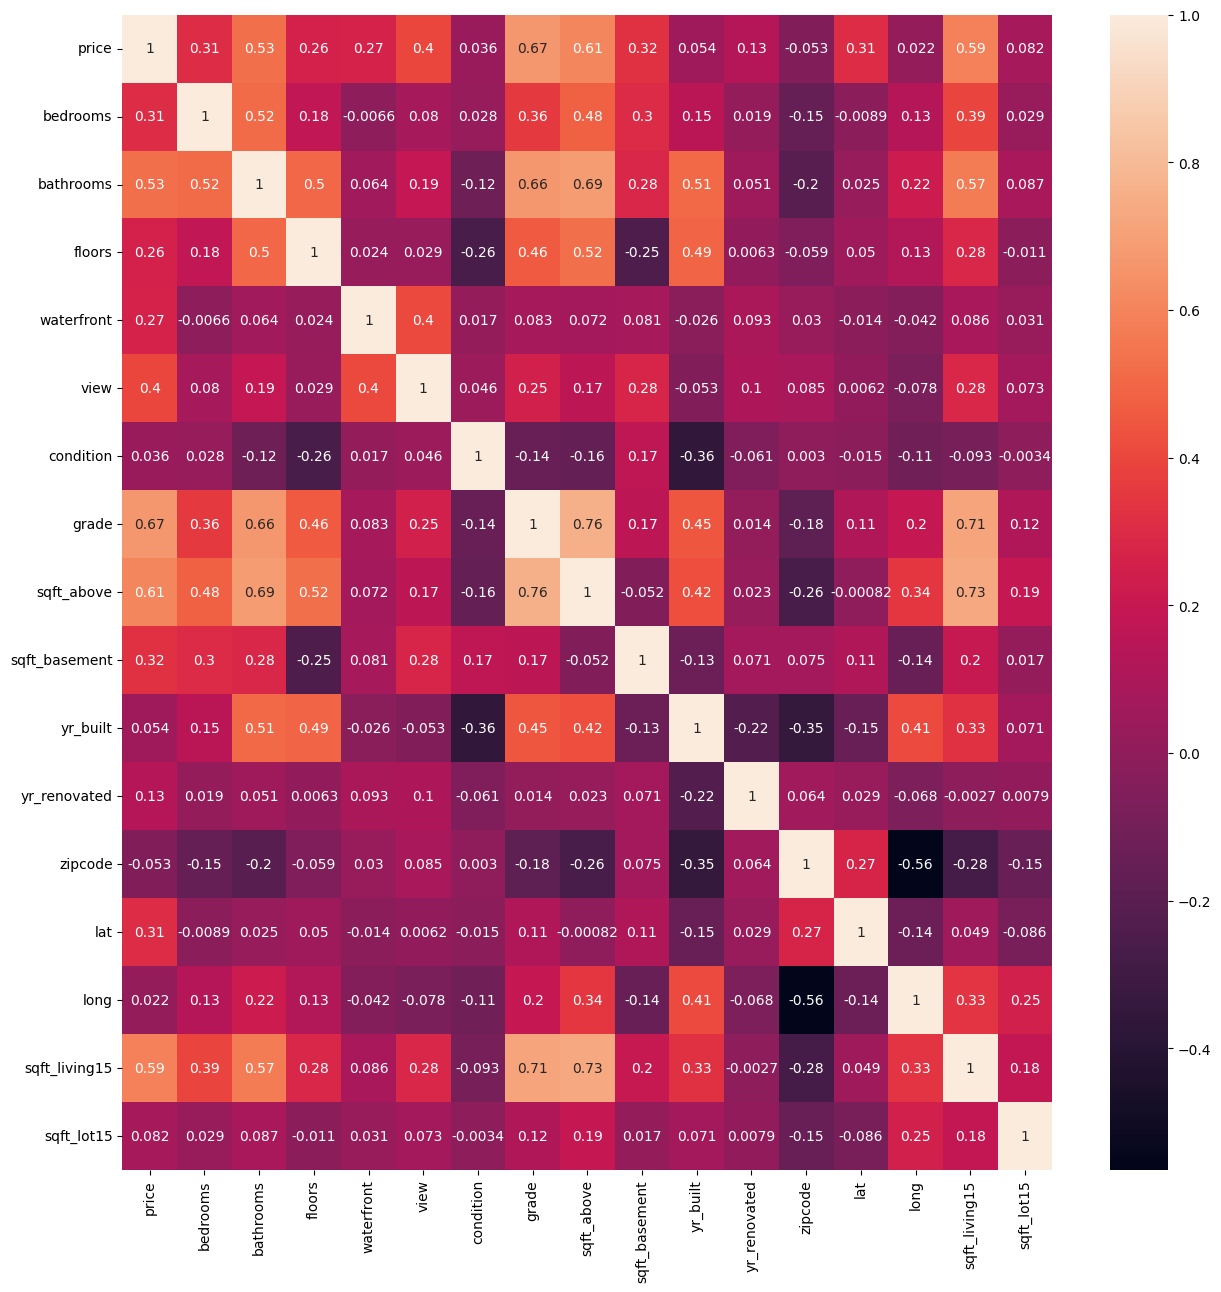

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(casas.corr(), annot=True)

O objetivo deste exercício é criar um modelo de regressão linear múltipla utilizando todos os atributos da base de dados. Compare os resultados entre os algoritmos

In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/HammadN98/Curso_Estatistica/main/dados/house_prices.csv")
dataset

In [ ]:
dataset = dataset.iloc[:, 2:]
dataset

In [ ]:
X = dataset.iloc[:, 2:].values
y = dataset.iloc[:, 0].values

### Modelo de regressao linear multipla sem os dados estarem noramlizados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train);

In [ ]:
regressor.score(X_train, y_train)

In [ ]:
regressor.score(X_test, y_test)


In [ ]:
previsoes = regressor.predict(X_test)
mean_absolute_error(y_test, previsoes)

### Modelo de Regressao Linear multipla com os dados normalizados

In [ ]:
y = np.log(y)
plt.hist(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train);

In [ ]:
regressor.score(X_train, y_train)

In [ ]:
regressor.score(X_test, y_test)


In [ ]:
previsoes = regressor.predict(X_test)
mean_absolute_error(y_test, previsoes)